In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

vip_df = pd.read_csv("C:\\Users\\seomi\\바탕 화면\\iM Digital academy\\data\\vip_final.csv")
vip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18036 entries, 0 to 18035
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   기준년월            18036 non-null  int64  
 1   세그먼트ID          18036 non-null  object 
 2   요구불예금잔액         18036 non-null  float64
 3   거치식예금잔액         18036 non-null  float64
 4   적립식예금잔액         18036 non-null  float64
 5   수익증권잔액          18036 non-null  float64
 6   신탁잔액            18036 non-null  float64
 7   퇴직연금잔액          18036 non-null  float64
 8   여신한도금액          18036 non-null  float64
 9   여신_운전자금대출잔액     18036 non-null  float64
 10  여신_시설자금대출잔액     18036 non-null  float64
 11  외환_수출실적금액       18036 non-null  float64
 12  외환_수입실적금액       18036 non-null  float64
 13  신용카드사용금액        18036 non-null  float64
 14  체크카드사용금액        18036 non-null  float64
 15  창구거래금액          18036 non-null  float64
 16  인터넷뱅킹거래금액       18036 non-null  float64
 17  스마트뱅킹거래금액       18036 non-null 

In [14]:
vip_df.columns

Index(['기준년월', '세그먼트ID', '요구불예금잔액', '거치식예금잔액', '적립식예금잔액', '수익증권잔액', '신탁잔액',
       '퇴직연금잔액', '여신한도금액', '여신_운전자금대출잔액', '여신_시설자금대출잔액', '외환_수출실적금액',
       '외환_수입실적금액', '신용카드사용금액', '체크카드사용금액', '창구거래금액', '인터넷뱅킹거래금액', '스마트뱅킹거래금액',
       '폰뱅킹거래금액', 'ATM거래금액', '자동이체금액', '요구불입금금액', '요구불출금금액', '총카드사용액', '총예금잔액',
       '총여신잔액', '총투자잔액', '총거래금액', '대출예금잔액', '법인_고객등급', '전담고객여부', '요구불예금좌수',
       '거치식예금좌수', '적립식예금좌수', '수익증권좌수', '신탁좌수', '퇴직연금좌수', '여신_운전자금대출좌수',
       '여신_시설자금대출좌수', '신용카드개수', '외환_수출실적거래건수', '외환_수입실적거래건수', '창구거래건수',
       '인터넷뱅킹거래건수', '스마트뱅킹거래건수', '폰뱅킹거래건수', 'ATM거래건수', '자동이체거래건수', '교차판매지수',
       '상품다양성지수', '총거래건수', 'LTV_Score', '거래감소율', '대출비중', 'LTV_Score_norm',
       '대출비중_norm', '거래감소율_norm', '상품다양성지수_norm', '리스크스코어'],
      dtype='object')

In [15]:
drop_cols = [ 'LTV_Score', '거래감소율', '대출비중', 'LTV_Score_norm',
       '대출비중_norm', '거래감소율_norm', '상품다양성지수_norm']

vip_df = vip_df.drop(columns=drop_cols)

In [16]:
# 1~3개월은 못 쓰니까 제외
data = vip_df[vip_df['기준년월'] >= 4]

In [17]:
# X는 예측할 때 쓸 데이터 (31~33개월)
X_test = data[(data['기준년월'] >= 202407) & (data['기준년월'] <= 202409)]
X_test = X_test.groupby('세그먼트ID').mean().reset_index()

# Y는 실제 정답 (34~36개월의 리스크스코어)
y_test = data[(data['기준년월'] >= 202410) & (data['기준년월'] <= 202412)]
y_test = y_test.groupby('세그먼트ID')['리스크스코어'].mean().reset_index()

# Train은 그 이전 구간 (4~30개월)
X_train = data[(data['기준년월'] >= 202204) & (data['기준년월'] <= 202406)]
X_train = X_train.groupby('세그먼트ID').mean().reset_index()

y_train = data[(data['기준년월'] >= 202204) & (data['기준년월'] <= 202406)]
y_train = y_train.groupby('세그먼트ID')['리스크스코어'].mean().reset_index()


In [18]:
from sklearn.ensemble import RandomForestRegressor

# X, y에서 세그먼트ID 제거
X_train_feat = X_train.drop(columns=['세그먼트ID', '리스크스코어'])
y_train_target = y_train['리스크스코어']

# 모델 만들고 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train_feat, y_train_target)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X_test_feat = X_test.drop(columns=['세그먼트ID', '리스크스코어'])
y_test_target = y_test['리스크스코어']

# 예측
y_pred = model.predict(X_test_feat)

# 평가
rmse = np.sqrt(mean_squared_error(y_test_target, y_pred))
mae = mean_absolute_error(y_test_target, y_pred)
r2 = r2_score(y_test_target, y_pred)

print("📊 모델 성능")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

📊 모델 성능
RMSE: 0.0488
MAE : 0.0360
R²  : 0.7172


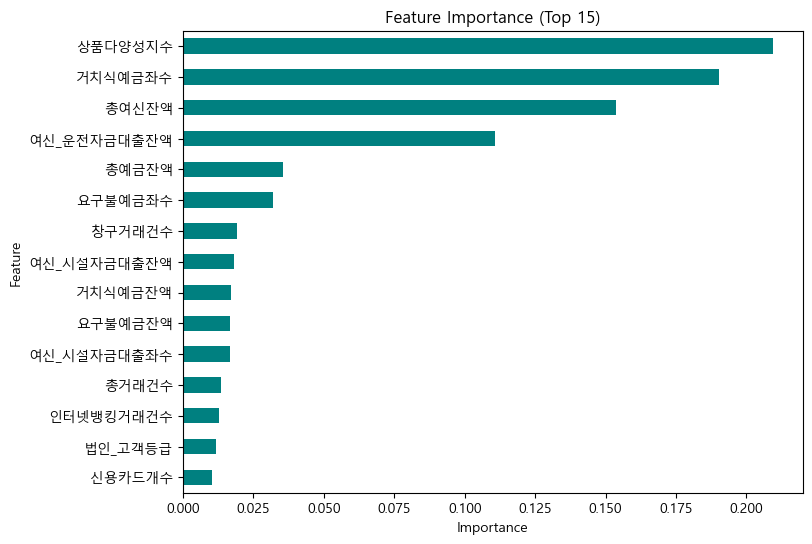

In [20]:
# 모델에서 변수 중요도 추출
feat_imp = pd.Series(model.feature_importances_, index=X_train_feat.columns)
feat_imp = feat_imp.sort_values(ascending=False)

# 상위 15개만 보기
top_n = 15
plt.figure(figsize=(8, 6))
feat_imp.head(top_n).plot(kind='barh', color='teal')
plt.gca().invert_yaxis()
plt.title(f'Feature Importance (Top {top_n})')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()